<a href="https://colab.research.google.com/github/Veronicarx77/441B-1/blob/main/HW_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 4
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

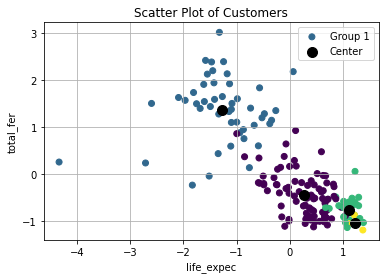

In [11]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = -3
x2_index = -2


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [12]:
WCSSs = []
Ks = range(1,30)
for k in Ks:
  kmeans = KMeans(n_clusters=k,n_init=30)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

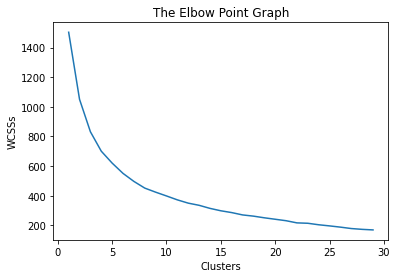

In [13]:
fig, ax = plt.subplots()

ax.plot(Ks, WCSSs)
ax.set_title('The Elbow Point Graph')
ax.set_xlabel('Clusters')
ax.set_ylabel('WCSSs')

plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

In [42]:
# I will set K to 7. 
# Reason 1: As for an Elbow Method, we choose the point where the rate of decrease in WCSS slows down, forming an "elbow" in the plot, which would be 5-10 in this plot.
# Reason 2: There's 167 samples in the dataset, it will be 20s samples in each group on average. It fits in the reality of country development level.

In [43]:
kmeans = KMeans(n_clusters=7,n_init=30)
kmeans.fit(X_scaled)

KMeans(n_clusters=7, n_init=30)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [44]:
cluster = kmeans.predict(X_scaled)
cluster

array([2, 0, 1, 2, 0, 1, 1, 5, 5, 1, 0, 0, 1, 0, 0, 5, 0, 2, 0, 1, 0, 1,
       1, 6, 0, 2, 2, 0, 2, 5, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0,
       5, 1, 1, 1, 1, 2, 2, 0, 0, 5, 5, 1, 2, 0, 5, 2, 5, 1, 1, 2, 2, 0,
       2, 0, 5, 1, 1, 1, 1, 5, 5, 5, 1, 5, 0, 1, 2, 2, 6, 0, 1, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1,
       5, 5, 2, 4, 5, 6, 2, 0, 0, 1, 1, 0, 5, 6, 1, 1, 2, 1, 6, 2, 0, 0,
       2, 3, 0, 0, 0, 1, 0, 5, 1, 1, 2, 1, 5, 5, 1, 2, 0, 2, 2, 1, 0, 1,
       1, 2, 0, 6, 5, 5, 1, 1, 1, 1, 0, 1, 2], dtype=int32)

In [45]:
names = np.array(df['country'])

cluster_0=[]
cluster_1=[]
cluster_2=[]
cluster_3=[]
cluster_4=[]
cluster_5=[]
cluster_6=[]

for i in range(0,len(names)):
  if cluster[i] == 0:
    cluster_0.append(names[i])
  elif cluster[i] == 1:
    cluster_1.append(names[i])
  elif cluster[i] == 2:
    cluster_2.append(names[i])
  elif cluster[i] == 3:
    cluster_3.append(names[i])
  elif cluster[i] == 4:
    cluster_4.append(names[i])
  elif cluster[i] == 5:
    cluster_5.append(names[i])
  elif cluster[i] == 6:
    cluster_6.append(names[i])

print('Cluster_0:',cluster_0)
print('Cluster_1:',cluster_1)
print('Cluster_2:',cluster_2)
print('Cluster_3:',cluster_3)
print('Cluster_4:',cluster_4)
print('Cluster_5:',cluster_5)
print('Cluster_6:',cluster_6)

Cluster_0: ['Albania', 'Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Estonia', 'Fiji', 'Georgia', 'Guyana', 'Hungary', 'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Montenegro', 'Panama', 'Paraguay', 'Poland', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'Solomon Islands', 'South Korea', 'Thailand', 'Tunisia', 'Ukraine', 'Vietnam']
Cluster_1: ['Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bolivia', 'Botswana', 'Brazil', 'China', 'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Gabon', 'Grenada', 'Guatemala', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Kazakhstan', 'Lao', 'Mongolia', 'Morocco', 'Myanmar', 'Nepal', 'Peru', 'Philippines', 'Romania', 'Ru

In [46]:
# No matter how I trained the model, setting k to 6 or 7 or 8, the Nigeria is always in a separate column alone.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [67]:
from tabulate import tabulate
kmeans = KMeans(n_clusters=7, n_init=30, random_state=0).fit(X)
centroids = pd.DataFrame(kmeans.cluster_centers_)
table = [['Cluster {}'.format(i+1)] + list(centroids.iloc[i]) for i in range(len(centroids))]

column_names = X.columns
print(tabulate(table, headers=column_names, floatfmt=".2f", tablefmt="grid"))

+-----------+--------------+-----------+----------+-----------+-----------+-------------+--------------+-------------+----------+
|           |   child_mort |   exports |   health |   imports |    income |   inflation |   life_expec |   total_fer |     gdpp |
+===========+==============+===========+==========+===========+===========+=============+==============+=============+==========+
| Cluster 1 |        63.06 |     31.04 |     6.15 |     45.94 |   4326.70 |        9.84 |        64.93 |        3.89 |  1947.79 |
+-----------+--------------+-----------+----------+-----------+-----------+-------------+--------------+-------------+----------+
| Cluster 2 |         4.29 |     43.14 |    10.77 |     40.13 |  41125.00 |        1.09 |        80.81 |        1.80 | 46112.50 |
+-----------+--------------+-----------+----------+-----------+-----------+-------------+--------------+-------------+----------+
| Cluster 3 |        17.74 |     43.85 |     6.70 |     45.21 |  16157.62 |        7.27 | 

# Q7.) Write an observation about the descriptive statistics.

Higher child mortality is always associated with shorter life expectancy and higher total fertility. And these countries are always poor developed ones.